### This notebook shows an example of how to load a dataset and create a decision tree for visualization

In [81]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

### Read dataset and prepare

In [82]:
# read data from csv file
# source of data: https://www.kaggle.com/ronitf/heart-disease-uci
import pandas as pd
FILE_PATH = "file:///<YOUR-FILEPATH>.csv"
my_data = pd.read_csv(FILE_PATH, delimiter=",")
my_data[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
# identify feature columns
labels = ['age', 'sex', 'cp', 'chol', 'fbs']

In [84]:
# get feature matrix
X = my_data[labels].values
X[0:5]

array([[ 63,   1,   3, 233,   1],
       [ 37,   1,   2, 250,   0],
       [ 41,   0,   1, 204,   0],
       [ 56,   1,   1, 236,   0],
       [ 57,   0,   0, 354,   0]])

In [85]:
# get target vector
y = my_data["target"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Create Decision Tree Model

In [86]:
# split dataset into train and test set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [87]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [88]:
model.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
predictions = model.predict(X_testset)

In [90]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predictions))

("DecisionTrees's Accuracy: ", 0.7252747252747253)


### Visualize Decision Tree

In [91]:
graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, class_names=['0', '1'] 
   , filled = True))

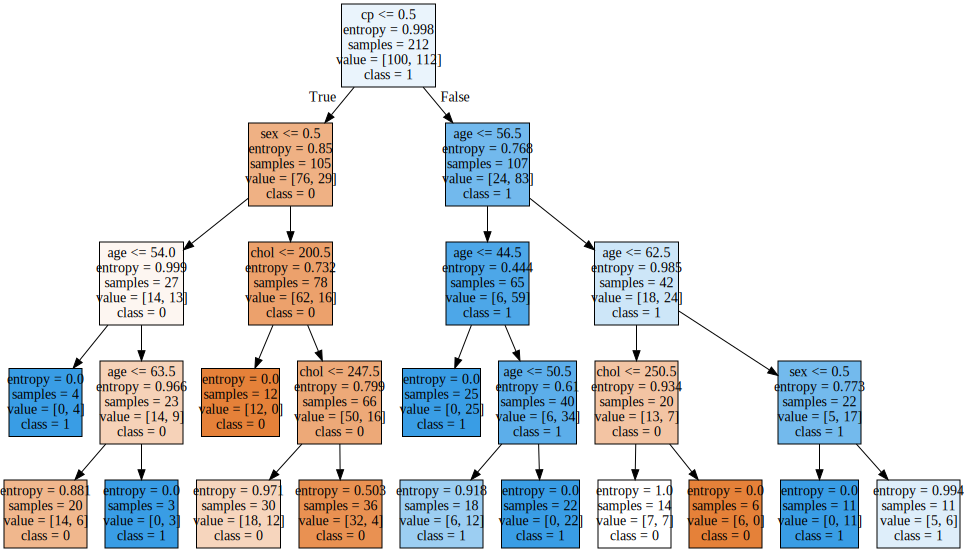

In [92]:
display(SVG(graph.pipe(format='svg')))